In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, norm, wilcoxon, kruskal, mannwhitneyu, rankdata
import statsmodels.api as sm

plt.rcdefaults()
sns.reset_defaults()
sns.set_style("whitegrid")
sns.set_palette("deep")

In [ ]:
without_df = pd.read_csv("/content/drive/MyDrive/without.csv")
with_df = pd.read_csv("/content/drive/MyDrive/with.csv")

without_df["label"] = 1 # Without Artificial Intelligence Label
with_df["label"] = 0 # With Artificial Intelligence Label

df = pd.concat([without_df, with_df], ignore_index=True)
df = df.drop(columns=["Zeitstempel", "Bitte bestätigen Sie, dass Sie die Informationen gelesen haben und mit der Teilnahme sowie der anonymen Auswertung Ihrer Antworten einverstanden sind."])

df = df.rename(columns={
    "Welches Geschlecht haben Sie?": "gender",
    "Wie alt sind Sie?": "age",
    "In welchem Land leben Sie derzeit?": "country",
    "Was ist Ihr höchster Bildungsabschluss?": "education",
    "Was ist Ihr derzeitiger beruflicher Status?": "job",
    "Wie gut beschreiben die folgenden Eigenschaften die gezeigte Werbung?\n(Skala von 1 = beschreibt sehr schlecht bis 5 = beschreibt sehr gut) [Die Werbung ist akkurat (präzise).]": "accurate",
    "Wie gut beschreiben die folgenden Eigenschaften die gezeigte Werbung?\n(Skala von 1 = beschreibt sehr schlecht bis 5 = beschreibt sehr gut) [Die Werbung ist vollständig.]": "complete",
    "Wie gut beschreiben die folgenden Eigenschaften die gezeigte Werbung?\n(Skala von 1 = beschreibt sehr schlecht bis 5 = beschreibt sehr gut) [Die Werbung ist sachkundig (kompetent).]": "knowledgeable",
    "Wie gut beschreiben die folgenden Eigenschaften die gezeigte Werbung?\n(Skala von 1 = beschreibt sehr schlecht bis 5 = beschreibt sehr gut) [Die Werbung ist ehrlich.]": "honest",
    "Wie gut beschreiben die folgenden Eigenschaften die gezeigte Werbung?\n(Skala von 1 = beschreibt sehr schlecht bis 5 = beschreibt sehr gut) [Die Werbung ist vertrauenswürdig.]": "trustworthy",
    "Wie gut beschreiben die folgenden Eigenschaften die gezeigte Werbung?\n(Skala von 1 = beschreibt sehr schlecht bis 5 = beschreibt sehr gut) [Die Werbung ist zuverlässig.]": "reliable",
    "Wie gut beschreiben die folgenden Eigenschaften die gezeigte Werbung?\n(Skala von 1 = beschreibt sehr schlecht bis 5 = beschreibt sehr gut) [Die Werbung ist klar.]": "clear",
    "Wie gut beschreiben die folgenden Eigenschaften die gezeigte Werbung?\n(Skala von 1 = beschreibt sehr schlecht bis 5 = beschreibt sehr gut) [Die Werbung ist nicht verwirrend.]": "confusing",
    "Wie gut beschreiben die folgenden Eigenschaften die gezeigte Werbung?\n(Skala von 1 = beschreibt sehr schlecht bis 5 = beschreibt sehr gut) [Die Werbung ist verständlich.]": "understandable",
    "Wie gut beschreiben die folgenden Eigenschaften die gezeigte Werbung?\n(Skala von 1 = beschreibt sehr schlecht bis 5 = beschreibt sehr gut) [Die Werbung ist interessant.]": "interesting",
    "Wie gut beschreiben die folgenden Eigenschaften die gezeigte Werbung?\n(Skala von 1 = beschreibt sehr schlecht bis 5 = beschreibt sehr gut) [Die Werbung hält meine Aufmerksamkeit.]": "maintaining_attention",
    "Wie bewerten Sie den Einsatz von Künstlicher Intelligenz in der Werbung allgemein?": "ai_attitude",
})

gender_translation = {
    "Männlich": "Male",
    "Weiblich": "Female",
    "Divers": "Diverse"
}

df["gender"] = df["gender"].map(gender_translation)

age_translation = {
    "Unter 18 Jahre": "<18",
    "18–24 Jahre": "18-24",
    "25–34 Jahre": "25-34",
    "35–44 Jahre": "35-44",
    "45–54 Jahre": "45-54",
    "55–64 Jahre": "55-64",
    "65 Jahre oder älter": ">65"
}

df["age"] = df["age"].map(age_translation)

country_translation = {
    "Deutschland": "Germany",
    "Österreich": "Austria",
    "Schweiz": "Switzerland"
}

df["country"] = df["country"].map(country_translation)

education_translation = {
    "Pflichtschule (z. B. Hauptschule)": "Compulsory School",
    "Berufsausbildung / Lehre": "Apprenticeship",
    "Mittlere Reife / Realschulabschluss": "Secondary School",
    "(Fach-)Abitur / Matura": "A-Levels",
    "Bachelorabschluss": "Bachelor's Degree",
    "Masterabschluss": "Master's Degree",
    "Doktorat (PhD)": "Doctorate (PhD)"
}

df['education'] = df['education'].map(education_translation)

job_translation = {
    "In Ausbildung": "In Training",
    "Student/in": "Student",
    "Angestellte/r": "Employee",
    "Beamte/r": "Civil Servant",
    "Selbstständig": "Self-Employed",
    "Arbeit suchend / arbeitslos": "Unemployed"
}

df['job'] = df['job'].map(job_translation)

columns_to_convert = [
    "accurate",
    "complete",
    "knowledgeable",
    "honest",
    "trustworthy",
    "reliable",
    "clear",
    "confusing",
    "understandable",
    "interesting",
    "maintaining_attention"
]

conversion_map = {
    "beschreibt sehr schlecht": 1,
    "beschreibt schlecht": 2,
    "neutral": 3,
    "beschreibt gut": 4,
    "beschreibt sehr gut": 5
}

for col in columns_to_convert:
  df[col] = df[col].map(conversion_map)

attitude_map = {
    "Sehr negativ": 1,
    "Eher negativ": 2,
    "Neutral": 3,
    "Eher positiv": 4,
    "Sehr positiv": 5
}

df["ai_attitude"] = df["ai_attitude"].map(attitude_map)

df.head()

,gender,age,country,education,job,accurate,complete,knowledgeable,honest,trustworthy,reliable,clear,confusing,understandable,interesting,maintaining_attention,ai_attitude,label
0,Female,18-24,Germany,A-Levels,Student,2,2,3,2,1,1,4,4,4,1,2,5,1
1,Female,45-54,Germany,Master's Degree,Civil Servant,4,3,2,3,4,3,2,4,3,3,2,2,1
2,Female,55-64,Germany,Secondary School,Employee,4,2,3,4,4,4,5,4,5,2,3,3,1
3,Female,18-24,Germany,A-Levels,Student,2,2,2,4,3,2,3,5,5,3,4,4,1
4,Male,18-24,Germany,A-Levels,Student,4,3,3,5,3,3,5,5,5,3,1,4,1


In [ ]:
# # Custom function to display percentage and count
# def autopct_format(values):
#     def my_format(pct):
#         total = sum(values)
#         count = int(round(pct * total / 100.0))
#         return f'{pct:.1f}% ({count})'
#     return my_format

# plt.figure(figsize=(15, 5))

# # Pie chart for overall gender distribution
# plt.subplot(1, 3, 1)
# gender_counts_total = df['gender'].value_counts()
# gender_counts_total.plot.pie(autopct=autopct_format(gender_counts_total), startangle=90)
# plt.title('Gender Distribution (Total)')
# plt.ylabel('')

# # Pie chart for gender distribution with label = 0
# df_label_0 = df[df['label'] == 0]
# gender_counts_0 = df_label_0['gender'].value_counts()
# plt.subplot(1, 3, 2)
# gender_counts_0.plot.pie(autopct=autopct_format(gender_counts_0), startangle=90)
# plt.title('Gender Distribution (Label = 0)')
# plt.ylabel('')

# # Pie chart for gender distribution with label = 1
# df_label_1 = df[df['label'] == 1]
# gender_counts_1 = df_label_1['gender'].value_counts()
# plt.subplot(1, 3, 3)
# gender_counts_1.plot.pie(autopct=autopct_format(gender_counts_1), startangle=90)
# plt.title('Gender Distribution (Label = 1)')
# plt.ylabel('')

# plt.tight_layout()
# plt.show()

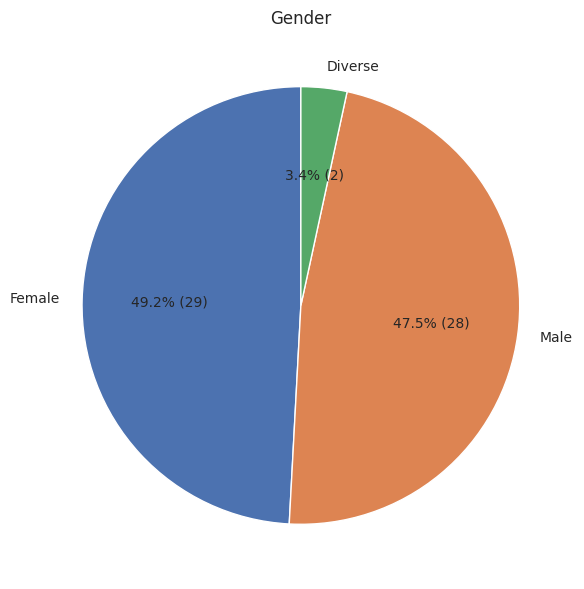

In [ ]:
# Custom function to display percentage and count
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({count})'
    return my_format

plt.figure(figsize=(6, 6))  # Adjusted figure size for a single plot

# Pie chart for overall gender distribution
gender_counts_total = df['gender'].value_counts()
gender_counts_total.plot.pie(autopct=autopct_format(gender_counts_total), startangle=90)
plt.title('Gender')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# # Create histograms for age distribution
# plt.figure(figsize=(15, 5))

# # Histogram for overall data
# plt.subplot(1, 3, 1)
# sns.countplot(data=df, x='age', order=age_translation.values())
# plt.title('Age Distribution (Total)')
# plt.xlabel('Age Range')
# plt.ylabel('Count')
# plt.xticks(rotation=45)

# # Histogram for data with label = 0
# plt.subplot(1, 3, 2)
# sns.countplot(data=df[df['label'] == 0], x='age', order=age_translation.values())
# plt.title('Age Distribution (Label = 0)')
# plt.xlabel('Age Range')
# plt.ylabel('Count')
# plt.xticks(rotation=45)

# # Histogram for data with label = 1
# plt.subplot(1, 3, 3)
# sns.countplot(data=df[df['label'] == 1], x='age', order=age_translation.values())
# plt.title('Age Distribution (Label = 1)')
# plt.xlabel('Age Range')
# plt.ylabel('Count')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

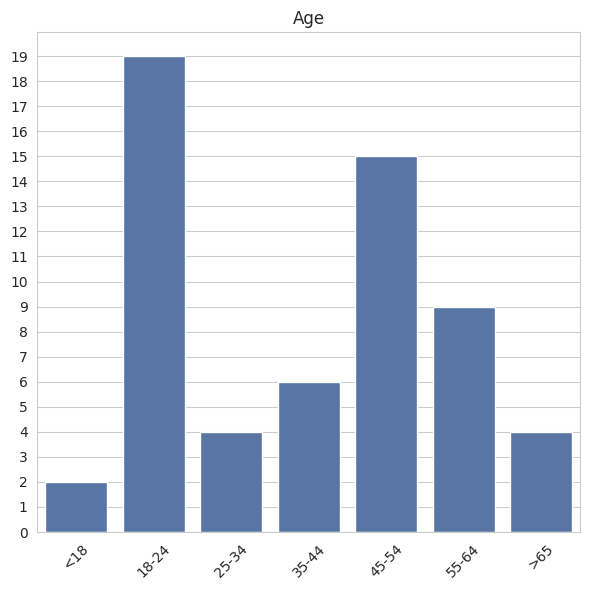

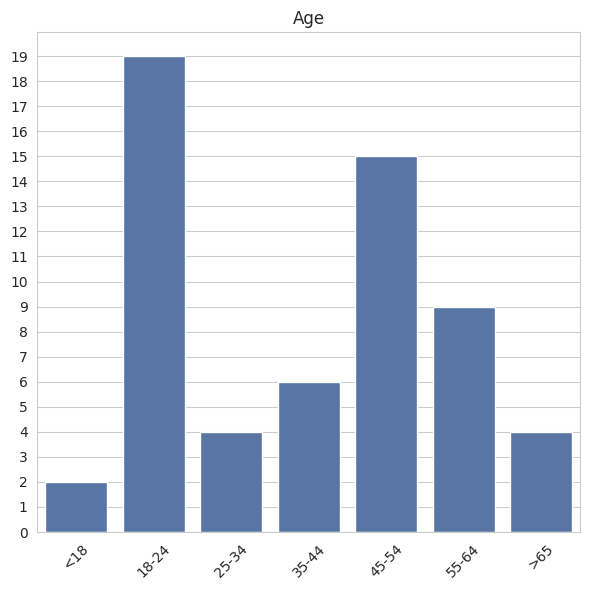

Relative Distribution of Age Groups:
age
<18       3.389831
18-24    32.203390
25-34     6.779661
35-44    10.169492
45-54    25.423729
55-64    15.254237
>65       6.779661
Name: count, dtype: float64


Age Statistics:
Total participants: 59
Most frequent age group (Mode):
18-24


In [ ]:
# Create a histogram for the overall age distribution
plt.figure(figsize=(6, 6)) # Adjusted figure size for a single plot

# Histogram for overall data
ax = sns.countplot(data=df, x='age', order=age_translation.values())
plt.title('Age')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)

# Get the current y-axis limits
ymin, ymax = ax.get_ylim()
# Set the y-axis ticks to integers within the limits
ax.set_yticks(range(int(ymin), int(ymax) + 1))


plt.tight_layout()
plt.show()

# Calculate the total number of participants
total_participants = len(df)

# Calculate the count for each age group
age_counts = df['age'].value_counts().reindex(age_translation.values())

# Calculate the relative distribution (percentage)
age_relative_distribution = (age_counts / total_participants) * 100
# Create a histogram for the overall age distribution
plt.figure(figsize=(6, 6)) # Adjusted figure size for a single plot

# Histogram for overall data
ax = sns.countplot(data=df, x='age', order=age_translation.values())
plt.title('Age')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)

# Get the current y-axis limits
ymin, ymax = ax.get_ylim()
# Set the y-axis ticks to integers within the limits
ax.set_yticks(range(int(ymin), int(ymax) + 1))


plt.tight_layout()
plt.show()

# Calculate the total number of participants
total_participants = len(df)

# Calculate the count for each age group
age_counts = df['age'].value_counts().reindex(age_translation.values())

# Calculate the relative distribution (percentage)
age_relative_distribution = (age_counts / total_participants) * 100

print("Relative Distribution of Age Groups:")
print(age_relative_distribution)
print("\n")

# Calculate the mean and median age.
# Since age is categorical, we can't calculate a true mean or median
# in a numerical sense from the current representation.
# We can calculate the count and the mode (most frequent age group).
print("Age Statistics:")
print(f"Total participants: {total_participants}")
print(f"Most frequent age group (Mode):\n{df['age'].mode()[0]}")

In [ ]:
# # Custom function to display percentage and count
# def autopct_format(values):
#     def my_format(pct):
#         total = sum(values)
#         count = int(round(pct * total / 100.0))
#         return f'{pct:.1f}% ({count})'
#     return my_format

# plt.figure(figsize=(15, 5))

# # Pie chart for overall country distribution
# plt.subplot(1, 3, 1)
# country_counts_total = df['country'].value_counts()
# country_counts_total.plot.pie(autopct=autopct_format(country_counts_total), startangle=90)
# plt.title('Country Distribution (Total)')
# plt.ylabel('')

# # Pie chart for country distribution with label = 0
# df_label_0 = df[df['label'] == 0]
# country_counts_0 = df_label_0['country'].value_counts()
# plt.subplot(1, 3, 2)
# country_counts_0.plot.pie(autopct=autopct_format(country_counts_0), startangle=90)
# plt.title('Country Distribution (Label = 0)')
# plt.ylabel('')

# # Pie chart for country distribution with label = 1
# df_label_1 = df[df['label'] == 1]
# country_counts_1 = df_label_1['country'].value_counts()
# plt.subplot(1, 3, 3)
# country_counts_1.plot.pie(autopct=autopct_format(country_counts_1), startangle=90)
# plt.title('Country Distribution (Label = 1)')
# plt.ylabel('')

# plt.tight_layout()
# plt.show()

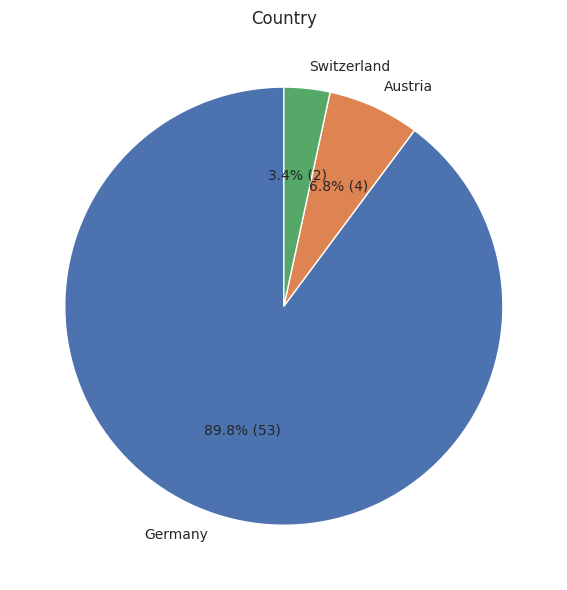

In [ ]:
# Custom function to display percentage and count
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}% ({count})'
    return my_format

plt.figure(figsize=(6, 6)) # Adjusted figure size for a single plot

# Pie chart for overall country distribution
country_counts_total = df['country'].value_counts()
country_counts_total.plot.pie(autopct=autopct_format(country_counts_total), startangle=90)
plt.title('Country')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# # Create bar charts for education distribution
# plt.figure(figsize=(15, 5))

# # Horizontal bar chart for overall data
# plt.subplot(1, 3, 1)
# sns.countplot(data=df, y='education', order=education_translation.values())  # Changed x to y
# plt.title('Education Distribution (Total)')
# plt.ylabel('Education Level')  # Swapped labels
# plt.xlabel('Count')

# # Horizontal bar chart for data with label = 0
# plt.subplot(1, 3, 2)
# sns.countplot(data=df[df['label'] == 0], y='education', order=education_translation.values())
# plt.title('Education Distribution (Label = 0)')
# plt.ylabel('Education Level')
# plt.xlabel('Count')

# # Horizontal bar chart for data with label = 1
# plt.subplot(1, 3, 3)
# sns.countplot(data=df[df['label'] == 1], y='education', order=education_translation.values())
# plt.title('Education Distribution (Label = 1)')
# plt.ylabel('Education Level')
# plt.xlabel('Count')

# plt.tight_layout()
# plt.show()

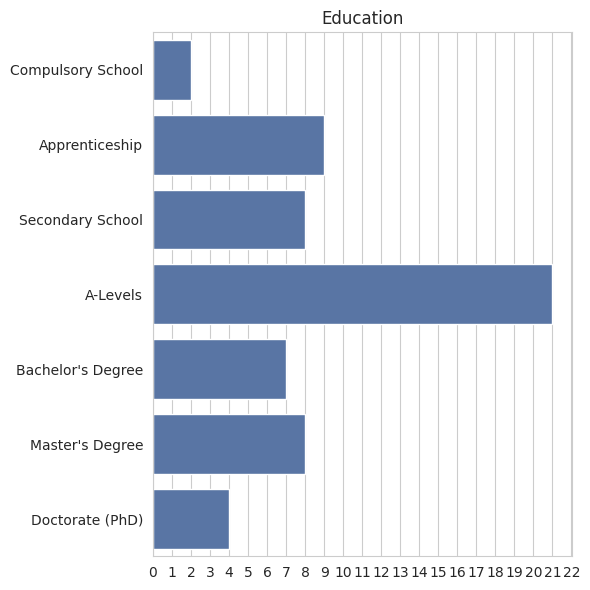

In [ ]:
# Create a bar chart for the overall education distribution
plt.figure(figsize=(6, 6)) # Adjusted figure size for a single plot

# Horizontal bar chart for overall data
ax = sns.countplot(data=df, y='education', order=education_translation.values())
plt.title('Education')
plt.ylabel('')
plt.xlabel('')

# Get the current x-axis limits
xmin, xmax = ax.get_xlim()
# Set the x-axis ticks to integers within the limits
ax.set_xticks(range(int(xmin), int(xmax) + 1))

plt.tight_layout()
plt.show()

In [ ]:
# # Create bar charts for job distribution
# plt.figure(figsize=(15, 5))

# # Horizontal bar chart for overall data
# plt.subplot(1, 3, 1)
# sns.countplot(data=df, y='job', order=job_translation.values())  # Changed x to y
# plt.title('Job Distribution (Total)')
# plt.ylabel('Job Level')  # Swapped labels
# plt.xlabel('Count')

# # Horizontal bar chart for data with label = 0
# plt.subplot(1, 3, 2)
# sns.countplot(data=df[df['label'] == 0], y='job', order=job_translation.values())
# plt.title('Job Distribution (Label = 0)')
# plt.ylabel('Job Level')
# plt.xlabel('Count')

# # Horizontal bar chart for data with label = 1
# plt.subplot(1, 3, 3)
# sns.countplot(data=df[df['label'] == 1], y='job', order=job_translation.values())
# plt.title('Job Distribution (Label = 1)')
# plt.ylabel('Job Level')
# plt.xlabel('Count')

# plt.tight_layout()
# plt.show()

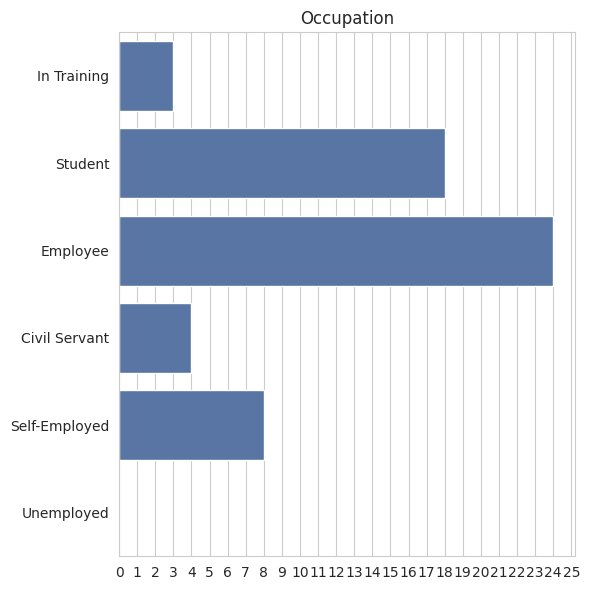

In [ ]:
# Create a bar chart for the overall education distribution
plt.figure(figsize=(6, 6)) # Adjusted figure size for a single plot

# Horizontal bar chart for overall data
ax = sns.countplot(data=df, y='job', order=job_translation.values())
plt.title('Occupation')
plt.ylabel('')
plt.xlabel('')

# Get the current x-axis limits
xmin, xmax = ax.get_xlim()
# Set the x-axis ticks to integers within the limits
ax.set_xticks(range(int(xmin), int(xmax) + 1))

plt.tight_layout()
plt.show()

In [ ]:
# # Create histograms for ai_attitude distribution
# plt.figure(figsize=(15, 5))

# # Ensure this is a list, not dict_values
# attitude_order = list(attitude_map.values())
# english_attitude_labels = ["Very Negative", "Rather Negative", "Neutral", "Rather Positive", "Very Positive"]

# # Histogram for overall data
# ax1 = plt.subplot(1, 3, 1)
# sns.countplot(data=df, x='ai_attitude', order=attitude_order, ax=ax1) # Pass ax1 to sns
# plt.title('AI Attitude Distribution (Total)')
# plt.xlabel('')
# plt.ylabel('')
# plt.xticks(ticks=range(len(attitude_order)), labels=english_attitude_labels, rotation=45)
# # Set y-axis ticks to integers for this subplot
# ymin, ymax = ax1.get_ylim()
# ax1.set_yticks(range(int(ymin), int(ymax) + 1))


# # Histogram for data with label = 0
# ax2 = plt.subplot(1, 3, 2)
# sns.countplot(data=df[df['label'] == 0], x='ai_attitude', order=attitude_order, ax=ax2) # Pass ax2 to sns
# plt.title('AI Attitude Distribution (Label = 0)')
# plt.xlabel('')
# plt.ylabel('')
# plt.xticks(ticks=range(len(attitude_order)), labels=english_attitude_labels, rotation=45)
# # Set y-axis ticks to integers for this subplot
# ymin, ymax = ax2.get_ylim()
# ax2.set_yticks(range(int(ymin), int(ymax) + 1))


# # Histogram for data with label = 1
# ax3 = plt.subplot(1, 3, 3)
# sns.countplot(data=df[df['label'] == 1], x='ai_attitude', order=attitude_order, ax=ax3) # Pass ax3 to sns
# plt.title('AI Attitude Distribution (Label = 1)')
# plt.xlabel('')
# plt.ylabel('')
# plt.xticks(ticks=range(len(attitude_order)), labels=english_attitude_labels, rotation=45)
# # Set y-axis ticks to integers for this subplot
# ymin, ymax = ax3.get_ylim()
# ax3.set_yticks(range(int(ymin), int(ymax) + 1))


# plt.tight_layout()
# plt.show()

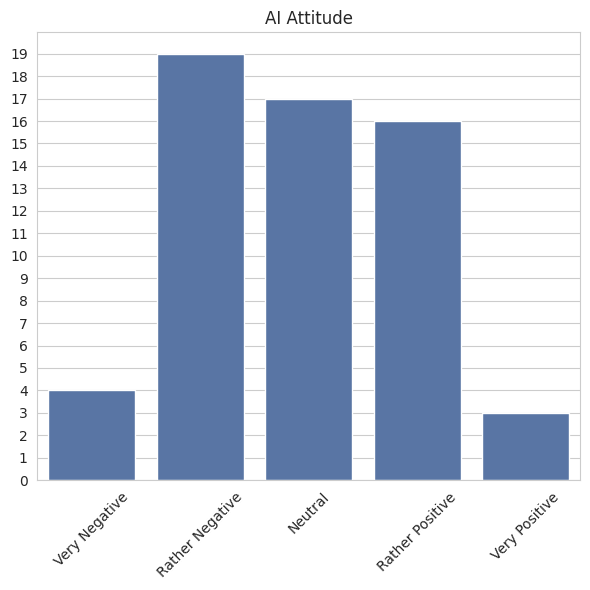

AI Attitude Distribution:
Very Negative: 4 participants (6.8%)
Rather Negative: 19 participants (32.2%)
Neutral: 17 participants (28.8%)
Rather Positive: 16 participants (27.1%)
Very Positive: 3 participants (5.1%)

Average AI Attitude Score: 2.92


In [ ]:
# Create histograms for ai_attitude distribution
plt.figure(figsize=(6, 6)) # Adjusted figure size for a single plot

# Ensure this is a list, not dict_values
attitude_order = list(attitude_map.values())
english_attitude_labels = ["Very Negative", "Rather Negative", "Neutral", "Rather Positive", "Very Positive"]

# Histogram for overall data
ax = sns.countplot(data=df, x='ai_attitude', order=attitude_order) # No need for ax parameter in sns.countplot when it's the only plot
plt.title('AI Attitude')
plt.xlabel('')
plt.ylabel('')
plt.xticks(ticks=range(len(attitude_order)), labels=english_attitude_labels, rotation=45)

# Set y-axis ticks to integers for this subplot
ymin, ymax = ax.get_ylim()
ax.set_yticks(range(int(ymin), int(ymax) + 1))


plt.tight_layout()
plt.show()

# Calculate and print the count and percentage for each attitude option
attitude_counts = df['ai_attitude'].value_counts().sort_index()
total_participants = len(df)
attitude_percentages = (attitude_counts / total_participants) * 100

print("AI Attitude Distribution:")
for attitude_value, count in attitude_counts.items():
    percentage = attitude_percentages[attitude_value]
    # Find the corresponding English label
    attitude_label = english_attitude_labels[attitude_order.index(attitude_value)]
    print(f"{attitude_label}: {count} participants ({percentage:.1f}%)")

# Calculate and print the average attitude score
average_attitude = df['ai_attitude'].mean()
print(f"\nAverage AI Attitude Score: {average_attitude:.2f}")

In [ ]:
# # Set up labels
# attitude_order = list(attitude_map.values())
# english_attitude_labels = ["Very Negative", "Rather Negative", "Neutral", "Rather Positive", "Very Positive"]

# # Define the translated age groups (assuming this column exists in your DataFrame)
# age_groups = ["<18", "18-24", "25-34", "35-44", "45-54", "55-64", ">65"]

# # Create subplots
# num_groups = len(age_groups)
# cols = 3
# rows = -(-num_groups // cols)  # Ceiling division for rows
# plt.figure(figsize=(5 * cols, 4 * rows))

# for i, age_group in enumerate(age_groups, 1):
#     plt.subplot(rows, cols, i)
#     subset = df[df['age'] == age_group]
#     sns.countplot(data=subset, x='ai_attitude', order=attitude_order)
#     plt.title(f'AI Attitude (Age {age_group})')
#     plt.xlabel('Attitude toward Artificial Intelligence in Advertising')
#     plt.ylabel('Count')
#     plt.xticks(ticks=range(len(attitude_order)), labels=english_attitude_labels, rotation=45)

# plt.tight_layout()
# plt.show()


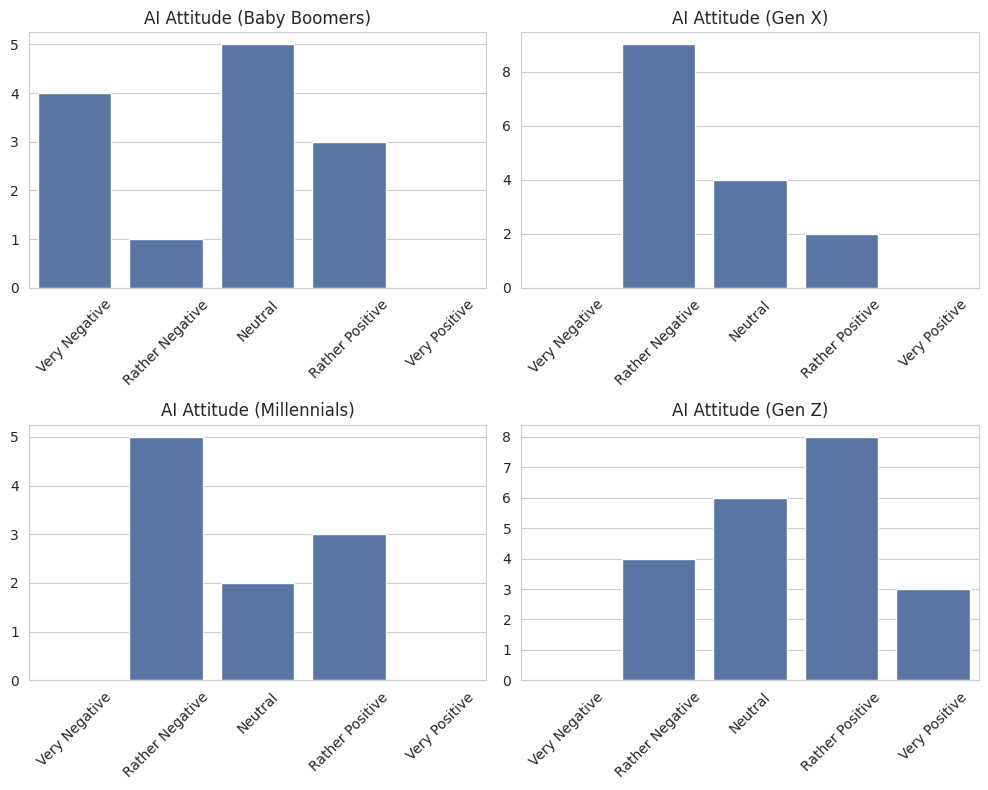


Predominant AI Attitude by Generation:
--------------------------------------------------

Baby Boomers (n=13):
  Negative: 5 participants (38.5%)
  Neutral: 5 participants (38.5%)
  Positive: 3 participants (23.1%)
  Predominant sentiment: Negative

Gen X (n=15):
  Negative: 9 participants (60.0%)
  Neutral: 4 participants (26.7%)
  Positive: 2 participants (13.3%)
  Predominant sentiment: Negative

Millennials (n=10):
  Negative: 5 participants (50.0%)
  Neutral: 2 participants (20.0%)
  Positive: 3 participants (30.0%)
  Predominant sentiment: Negative

Gen Z (n=21):
  Negative: 4 participants (19.0%)
  Neutral: 6 participants (28.6%)
  Positive: 11 participants (52.4%)
  Predominant sentiment: Positive


In [ ]:
# Map age groups to generations
def map_age_to_generation(age_group, precise=False):
    base_mapping = {
        "<18": "Gen Z",
        "18-24": "Gen Z",
        "25-34": "Millennials",
        "35-44": "Millennials",
        "45-54": "Gen X",
        "55-64": "Baby Boomers"
    }
    if precise:
        base_mapping[">65"] = "Silent Generation"
    else:
        base_mapping[">65"] = "Baby Boomers"
    return base_mapping.get(age_group, "Unknown")

# Apply generation mapping to DataFrame
df['generation'] = df['age'].map(map_age_to_generation)

# Set up labels
english_attitude_labels = ["Very Negative", "Rather Negative", "Neutral", "Rather Positive", "Very Positive"]
generations = ["Baby Boomers", "Gen X", "Millennials", "Gen Z"]
num_groups = len(generations)
cols, rows = 2, -(-num_groups // 2)  # Ceiling division

plt.figure(figsize=(5 * cols, 4 * rows))

for i, gen in enumerate(generations, 1):
    plt.subplot(rows, cols, i)
    subset = df[df['generation'] == gen]

    if subset.empty:
        plt.text(0.5, 0.5, f'No data for {gen}', ha='center', va='center', transform=plt.gca().transAxes)
    else:
        sns.countplot(data=subset, x='ai_attitude', order=attitude_map.values())
        plt.ylabel('') # Count
        plt.xlabel('') # Attitude toward Artificial Intelligence in Advertising
        plt.xticks(ticks=range(len(attitude_map)), labels=english_attitude_labels, rotation=45)

    plt.title(f'AI Attitude ({gen})') # (n={len(subset)})

plt.tight_layout()
plt.show()

# Analyze predominant attitudes by generation
print("\nPredominant AI Attitude by Generation:")
print("-" * 50)

attitude_categories = {
    "Negative": [1, 2],
    "Neutral": [3],
    "Positive": [4, 5]
}

for gen in generations:
    subset = df[df['generation'] == gen]
    if not subset.empty:
        total_in_generation = len(subset)
        print(f"\n{gen} (n={total_in_generation}):")

        for sentiment, values in attitude_categories.items():
            count = subset[subset['ai_attitude'].isin(values)].shape[0]
            percentage = (count / total_in_generation) * 100 if total_in_generation > 0 else 0
            print(f"  {sentiment}: {count} participants ({percentage:.1f}%)")

        # Determine the predominant sentiment
        sentiment_counts = {sent: subset[subset['ai_attitude'].isin(vals)].shape[0] for sent, vals in attitude_categories.items()}
        if total_in_generation > 0:
            predominant_sentiment = max(sentiment_counts, key=sentiment_counts.get)
            print(f"  Predominant sentiment: {predominant_sentiment}")
        else:
             print("  No data to determine predominant sentiment.")

    else:
        print(f"\n{gen}: No data for this generation.")

In [ ]:
competence_cols = ["accurate", "complete", "knowledgeable"]
trustworthiness_cols = ["honest", "trustworthy", "reliable"]
clarity_cols = ["clear", "confusing", "understandable"]
engagement_cols = ["interesting", "maintaining_attention"]

# Calculate the mean for each category for each row
df['Competence'] = df[competence_cols].mean(axis=1)
df['Trustworthiness'] = df[trustworthiness_cols].mean(axis=1)
df['Clarity'] = df[clarity_cols].mean(axis=1)
df['Engagement'] = df[engagement_cols].mean(axis=1)

# Calculate the mean and standard deviation of the categories for the total dataset
mean_categories_total = df[['Competence', 'Trustworthiness', 'Clarity', 'Engagement']].mean()
std_categories_total = df[['Competence', 'Trustworthiness', 'Clarity', 'Engagement']].std()

# Now group by 'label' and calculate the mean and standard deviation of the new category columns
mean_categories_by_label = df.groupby('label')[['Competence', 'Trustworthiness', 'Clarity', 'Engagement']].mean()
std_categories_by_label = df.groupby('label')[['Competence', 'Trustworthiness', 'Clarity', 'Engagement']].std()

# Display the results for the total dataset
print("Advertising Category Scores (Total Dataset):")
print("Mean:")
display(mean_categories_total)
print("\nStandard Deviation:")
display(std_categories_total)

# Display the results for each label
print("\nAdvertising Category Scores by Label (0=With AI, 1=Without AI):")
print("Mean:")
display(mean_categories_by_label)
print("\nStandard Deviation:")
display(std_categories_by_label)

Advertising Category Scores (Total Dataset):
Mean:


,0
Competence,2.892655
Trustworthiness,2.853107
Clarity,3.242938
Engagement,2.423729



Standard Deviation:


,0
Competence,0.701505
Trustworthiness,0.831080
Clarity,1.029880
Engagement,0.735864



Advertising Category Scores by Label (0=With AI, 1=Without AI):
Mean:


,Competence,Trustworthiness,Clarity,Engagement
label,,,,
0,3.086022,2.924731,3.344086,2.532258
1,2.678571,2.773810,3.130952,2.303571



Standard Deviation:


,Competence,Trustworthiness,Clarity,Engagement
label,,,,
0,0.666487,0.828697,0.940779,0.773902
1,0.687826,0.841582,1.127068,0.685015


In [ ]:
# Assuming 'df' already includes the computed category columns
categories = ['Competence', 'Trustworthiness', 'Clarity', 'Engagement']
alpha = 0.05  # significance level

print("Normality Tests (Shapiro-Wilk & Kolmogorov-Smirnov):\n")

# Perform tests for the total dataset
print("--- Total Dataset ---")
for col in categories:
    data = df[col].dropna()

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(data)

    # Kolmogorov-Smirnov Test against normal distribution with same mean/std
    ks_stat, ks_p = kstest(data, 'norm', args=(data.mean(), data.std()))

    print(f"{col}:\n"
          f"  Shapiro-Wilk Test: p = {shapiro_p:.4f} => {'Not normal' if shapiro_p < alpha else 'Normal'}\n"
          f"  Kolmogorov-Smirnov Test: p = {ks_p:.4f} => {'Not normal' if ks_p < alpha else 'Normal'}")
    print("-" * 20)


# Perform tests for label = 0
print("\n--- Label = 0 ---")
df_label_0 = df[df['label'] == 0]
for col in categories:
    data = df_label_0[col].dropna()

    if not data.empty:
        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(data)

        # Kolmogorov-Smirnov Test against normal distribution with same mean/std
        ks_stat, ks_p = kstest(data, 'norm', args=(data.mean(), data.std()))

        print(f"{col}:\n"
              f"  Shapiro-Wilk Test: p = {shapiro_p:.4f} => {'Not normal' if shapiro_p < alpha else 'Normal'}\n"
              f"  Kolmogorov-Smirnov Test: p = {ks_p:.4f} => {'Not normal' if ks_p < alpha else 'Normal'}")
    else:
        print(f"{col}: No data for this label.")
    print("-" * 20)


# Perform tests for label = 1
print("\n--- Label = 1 ---")
df_label_1 = df[df['label'] == 1]
for col in categories:
    data = df_label_1[col].dropna()

    if not data.empty:
        # Shapiro-Wilk Test
        shapiro_stat, shapiro_p = shapiro(data)

        # Kolmogorov-Smirnov Test against normal distribution with same mean/std
        ks_stat, ks_p = kstest(data, 'norm', args=(data.mean(), data.std()))

        print(f"{col}:\n"
              f"  Shapiro-Wilk Test: p = {shapiro_p:.4f} => {'Not normal' if shapiro_p < alpha else 'Normal'}\n"
              f"  Kolmogorov-Smirnov Test: p = {ks_p:.4f} => {'Not normal' if ks_p < alpha else 'Normal'}")
    else:
        print(f"{col}: No data for this label.")
    print("-" * 20)

Normality Tests (Shapiro-Wilk & Kolmogorov-Smirnov):

--- Total Dataset ---
Competence:
  Shapiro-Wilk Test: p = 0.0975 => Normal
  Kolmogorov-Smirnov Test: p = 0.2186 => Normal
--------------------
Trustworthiness:
  Shapiro-Wilk Test: p = 0.1144 => Normal
  Kolmogorov-Smirnov Test: p = 0.2405 => Normal
--------------------
Clarity:
  Shapiro-Wilk Test: p = 0.0423 => Not normal
  Kolmogorov-Smirnov Test: p = 0.5680 => Normal
--------------------
Engagement:
  Shapiro-Wilk Test: p = 0.0032 => Not normal
  Kolmogorov-Smirnov Test: p = 0.0469 => Not normal
--------------------

--- Label = 0 ---
Competence:
  Shapiro-Wilk Test: p = 0.1804 => Normal
  Kolmogorov-Smirnov Test: p = 0.3356 => Normal
--------------------
Trustworthiness:
  Shapiro-Wilk Test: p = 0.3097 => Normal
  Kolmogorov-Smirnov Test: p = 0.5467 => Normal
--------------------
Clarity:
  Shapiro-Wilk Test: p = 0.3596 => Normal
  Kolmogorov-Smirnov Test: p = 0.4426 => Normal
--------------------
Engagement:
  Shapiro-Wilk T

In [ ]:
# Assuming 'df' already includes the computed category columns and 'label' column
categories = ['Competence', 'Trustworthiness', 'Clarity', 'Engagement']
alpha = 0.05  # significance level

print("Mann-Whitney U Test Results:")
print("-" * 50)

# Separate the data by label
group_0 = df[df['label'] == 0]
group_1 = df[df['label'] == 1]

for col in categories:
    # Get the data for the current category for each group and drop NaNs
    data_0 = group_0[col].dropna()
    data_1 = group_1[col].dropna()

    if not data_0.empty and not data_1.empty:
        # Perform the Mann-Whitney U test for independent samples
        stat, p_value = mannwhitneyu(data_0, data_1, alternative='two-sided')

        print(f"Category: {col}")
        print(f"  Test Statistic (U): {stat:.4f}")
        print(f"  P-value: {p_value:.4f}")
        if p_value < alpha:
            print("  Result: Statistically significant difference (Reject H0)")
        else:
            print("  Result: No statistically significant difference (Fail to reject H0)")
        print("-" * 20)
    else:
        print(f"Category: {col} - Not enough data in one or both groups.")
        print("-" * 20)

Mann-Whitney U Test Results:
--------------------------------------------------
Category: Competence
  Test Statistic (U): 567.0000
  P-value: 0.0415
  Result: Statistically significant difference (Reject H0)
--------------------
Category: Trustworthiness
  Test Statistic (U): 481.0000
  P-value: 0.4769
  Result: No statistically significant difference (Fail to reject H0)
--------------------
Category: Clarity
  Test Statistic (U): 484.0000
  P-value: 0.4503
  Result: No statistically significant difference (Fail to reject H0)
--------------------
Category: Engagement
  Test Statistic (U): 512.5000
  P-value: 0.2270
  Result: No statistically significant difference (Fail to reject H0)
--------------------


🔍 Visualizing distributions (Boxplots & Violin Plots):



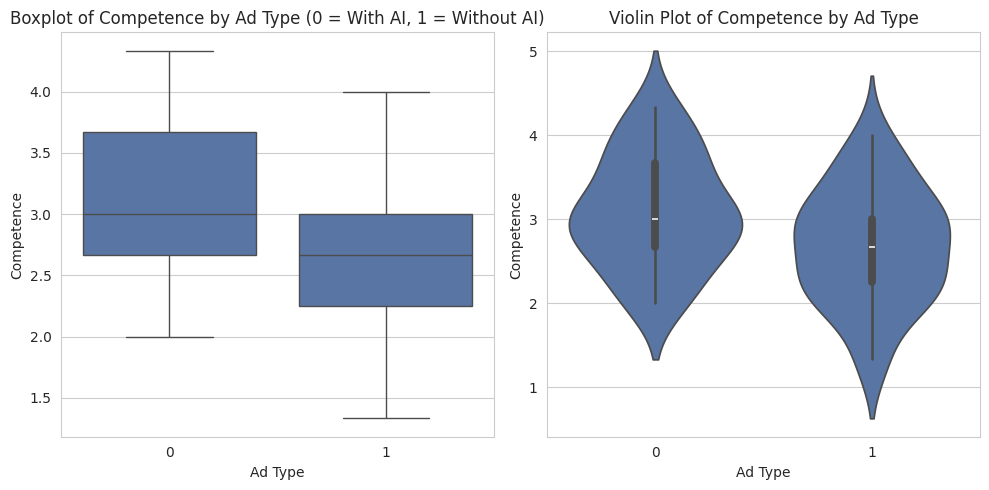

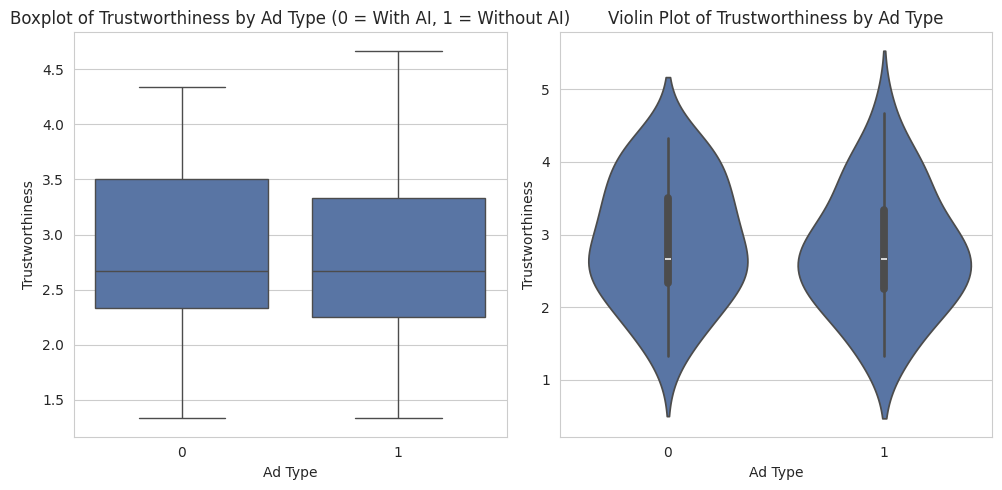

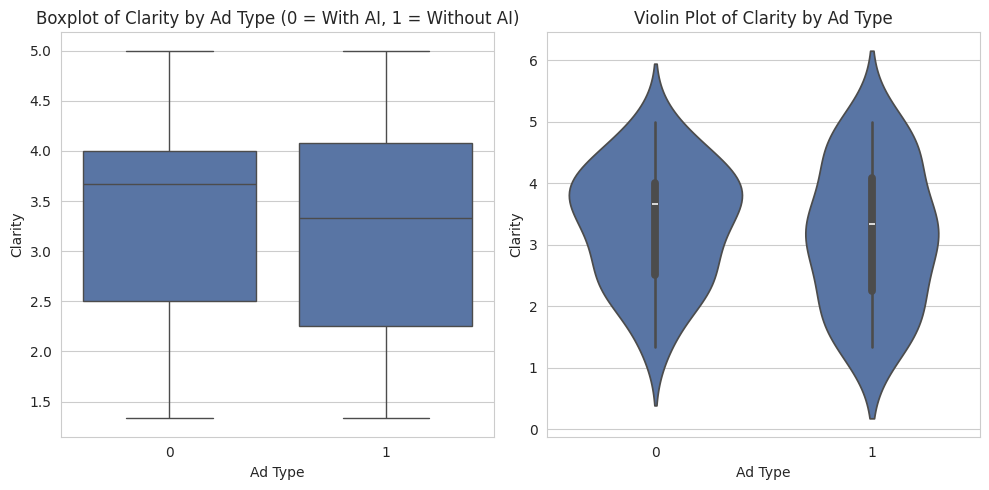

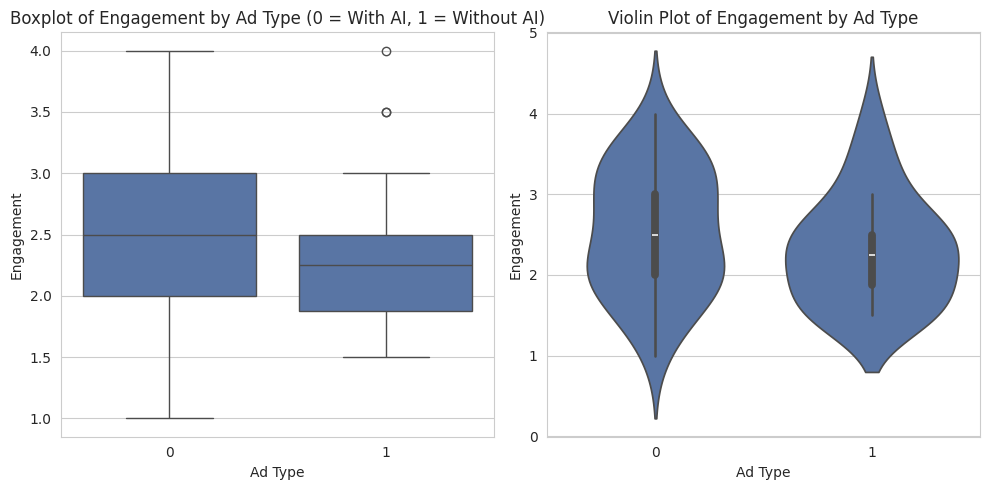

🔍 Visualizing distributions (Boxplots only):



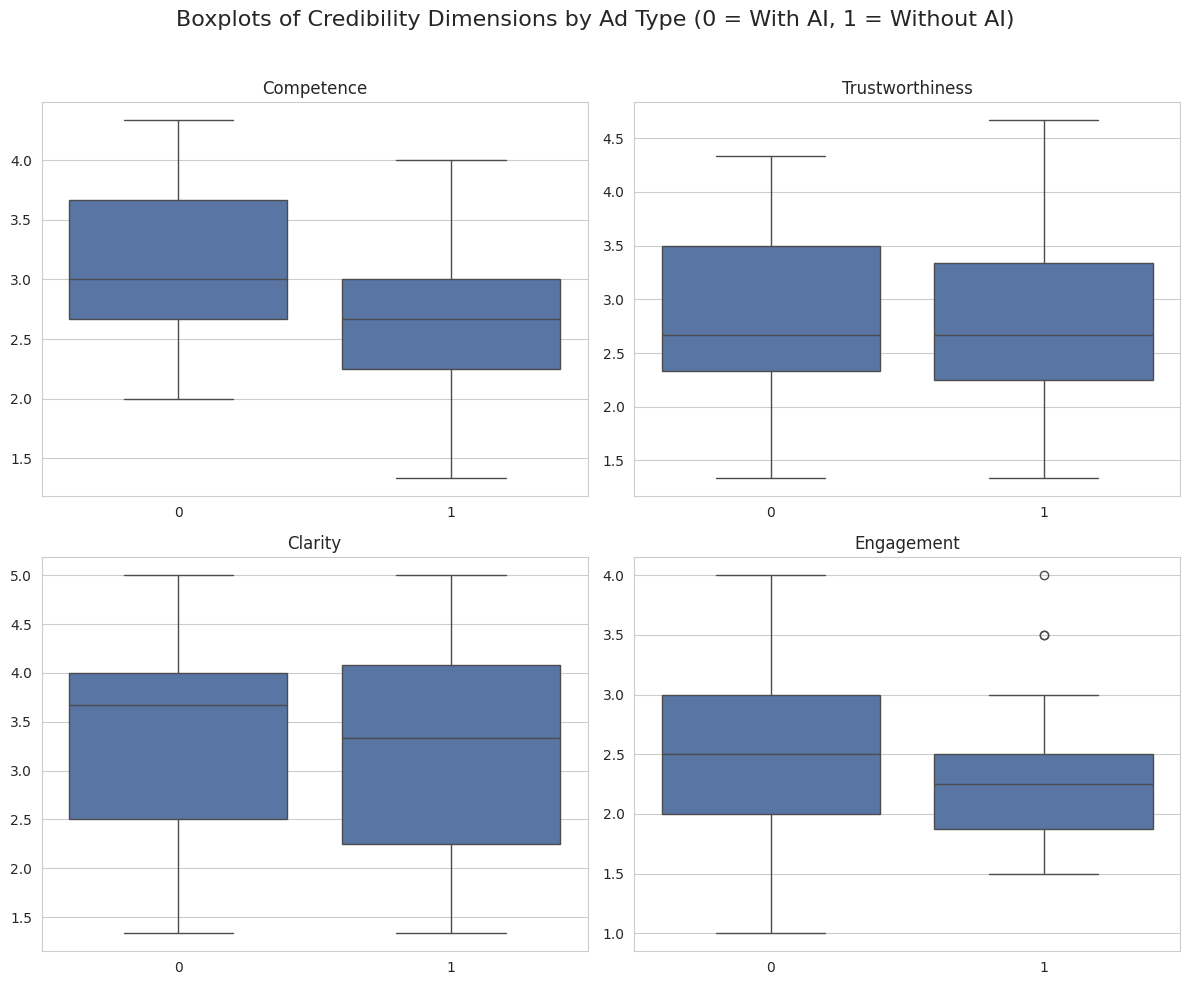

📐 Effect Sizes (Rank-Biserial Correlation):

Competence: Rank-Biserial Correlation = -0.3065 (Medium)
Trustworthiness: Rank-Biserial Correlation = -0.1083 (Small)
Clarity: Rank-Biserial Correlation = -0.1152 (Small)
Engagement: Rank-Biserial Correlation = -0.1809 (Small)
--------------------------------------------------
📊 Directionality (Means and Medians by Group):

Competence:
  Mean (With AI)     = 3.09
  Mean (Without AI)  = 2.68
  Median (With AI)   = 3.00
  Median (Without AI)= 2.67
📌 Interpretation: AI-generated ads scored higher in 'Competence' (based on means), with a medium effect size (r = -0.31).
------------------------------
Trustworthiness:
  Mean (With AI)     = 2.92
  Mean (Without AI)  = 2.77
  Median (With AI)   = 2.67
  Median (Without AI)= 2.67
📌 Interpretation: AI-generated ads scored higher in 'Trustworthiness' (based on means), with a small effect size (r = -0.11).
------------------------------
Clarity:
  Mean (With AI)     = 3.34
  Mean (Without AI)  = 3.13
 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# 1. VISUALIZATION: Boxplots and Violin Plots
print("🔍 Visualizing distributions (Boxplots & Violin Plots):\n")

for col in categories:
    plt.figure(figsize=(10, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f"Boxplot of {col} by Ad Type (0 = With AI, 1 = Without AI)")
    plt.xlabel("Ad Type")
    plt.ylabel(col)

    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(x='label', y=col, data=df, inner='box')
    plt.title(f"Violin Plot of {col} by Ad Type")
    plt.xlabel("Ad Type")
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

# 1.5 VISUALIZATION: 2x2 Boxplot Grid
print("🔍 Visualizing distributions (Boxplots only):\n")

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Boxplots of Credibility Dimensions by Ad Type (0 = With AI, 1 = Without AI)", fontsize=16)

for ax, col in zip(axs.flat, categories):
    sns.boxplot(x='label', y=col, data=df, ax=ax)
    ax.set_title(f"{col}")
    ax.set_xlabel("") # Ad Type
    ax.set_ylabel("") # col

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the suptitle
plt.show()


# 2. EFFECT SIZE: Rank-biserial correlation
def rank_biserial_effect_size(x, y):
    u_stat, _ = mannwhitneyu(x, y, alternative='two-sided')
    n1 = len(x)
    n2 = len(y)
    rbc = 1 - (2 * u_stat) / (n1 * n2)
    return rbc

print("📐 Effect Sizes (Rank-Biserial Correlation):\n")

effect_size_results = {}

for col in categories:
    data_0 = group_0[col].dropna()
    data_1 = group_1[col].dropna()

    if not data_0.empty and not data_1.empty:
        effect_size = rank_biserial_effect_size(data_0, data_1)
        strength = 'Small' if abs(effect_size) < 0.3 else 'Medium' if abs(effect_size) < 0.5 else 'Large'
        effect_size_results[col] = {
            "effect_size": effect_size,
            "strength": strength
        }
        print(f"{col}: Rank-Biserial Correlation = {effect_size:.4f} ({strength})")
    else:
        print(f"{col}: Not enough data.")
print("-" * 50)

# 3. DIRECTIONALITY: Compare Means and Medians + Plain Interpretation
print("📊 Directionality (Means and Medians by Group):\n")

for col in categories:
    mean_with_ai = group_0[col].mean()
    mean_without_ai = group_1[col].mean()
    median_with_ai = group_0[col].median()
    median_without_ai = group_1[col].median()

    direction = "AI-generated ads scored higher" if mean_with_ai > mean_without_ai else "Non-AI ads scored higher"

    print(f"{col}:")
    print(f"  Mean (With AI)     = {mean_with_ai:.2f}")
    print(f"  Mean (Without AI)  = {mean_without_ai:.2f}")
    print(f"  Median (With AI)   = {median_with_ai:.2f}")
    print(f"  Median (Without AI)= {median_without_ai:.2f}")
    print(f"📌 Interpretation: {direction} in '{col}' (based on means), "
          f"with a {effect_size_results[col]['strength'].lower()} effect size (r = {effect_size_results[col]['effect_size']:.2f}).")
    print("-" * 30)
